In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [17]:
#checking missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [18]:
#checking duplicates
df.duplicated().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
#checking unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [22]:
#check statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##Exploring Data

In [32]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test prep course' variable: ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test prep course' variable:  ['none' 'completed']


In [33]:
#splitting numerical and categorical features

num_features=[feature for feature in df.columns if df[feature].dtype != 'O']
cat_features=[feature for feature in df.columns if df[feature].dtype == 'O']

In [39]:
#printing num and cat features
print('Numerical features are {}: {}'.format(len(num_features), num_features))
print("Categorical features are {}: {}".format(len(cat_features), cat_features))

Numerical features are 3: ['math score', 'reading score', 'writing score']
Categorical features are 5: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [40]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [ ]:
#now creating total score and avg score columns
df['total score']=df['math score'] + df['reading score'] + df['writing score']
df['average']=df['total score']/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,82.333333


In [45]:
df.drop(df['Total score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,76.333333
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,223,74.333333


In [46]:
df.drop(columns=['Total score'], inplace=True)

In [47]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [50]:
#no of students getting full score
math_full=df[df['math score'] == 100]['average'].count()
reading_full=df[df['reading score'] == 100]['average'].count()
writing_full=df[df['writing score'] == 100]['average'].count()


print("No. of students getting full in Maths: ", math_full)
print("No. of students getting full in Reading: ", reading_full)
print("No. of students getting full in Writing: ", writing_full)

No. of students getting full in Maths:  7
No. of students getting full in Reading:  17
No. of students getting full in Writing:  14


In [52]:
#no of students getting less than 20
math_less20=df[df['math score'] < 20]['average'].count()
reading_less20=df[df['reading score'] < 20]['average'].count()
writing_less20=df[df['writing score'] < 20]['average'].count()


print("No. of students getting less than 20 in Maths: ", math_less20)
print("No. of students getting less than 20 in Reading: ", reading_less20)
print("No. of students getting less than 20 in Writing: ", writing_less20)

No. of students getting less than 20 in Maths:  4
No. of students getting less than 20 in Reading:  1
No. of students getting less than 20 in Writing:  3


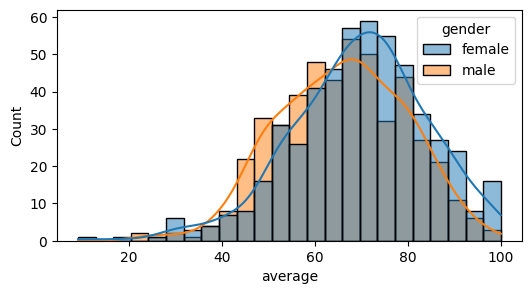

In [54]:
#average and total score analysis
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

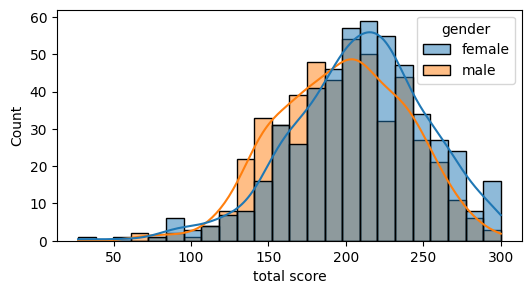

In [55]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

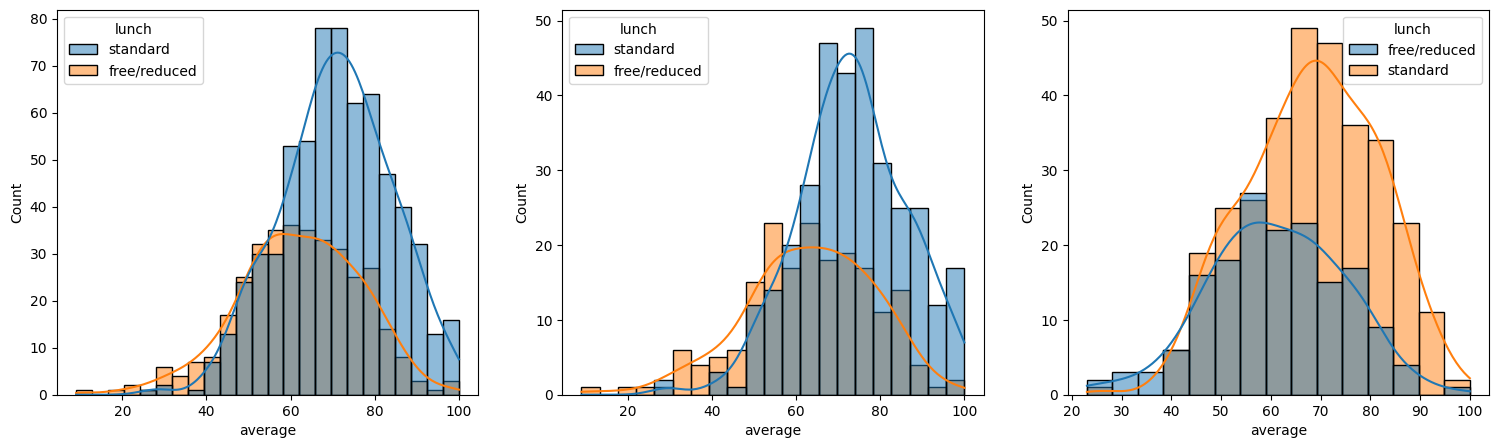

In [58]:
#impact of lunch in exams
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

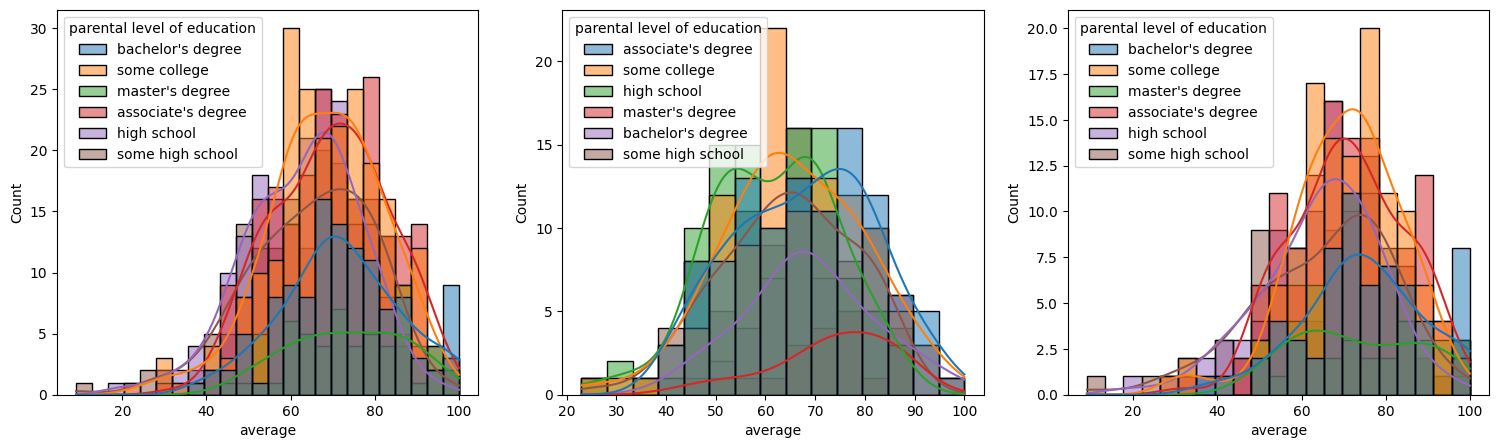

In [59]:
#impact of parental education
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

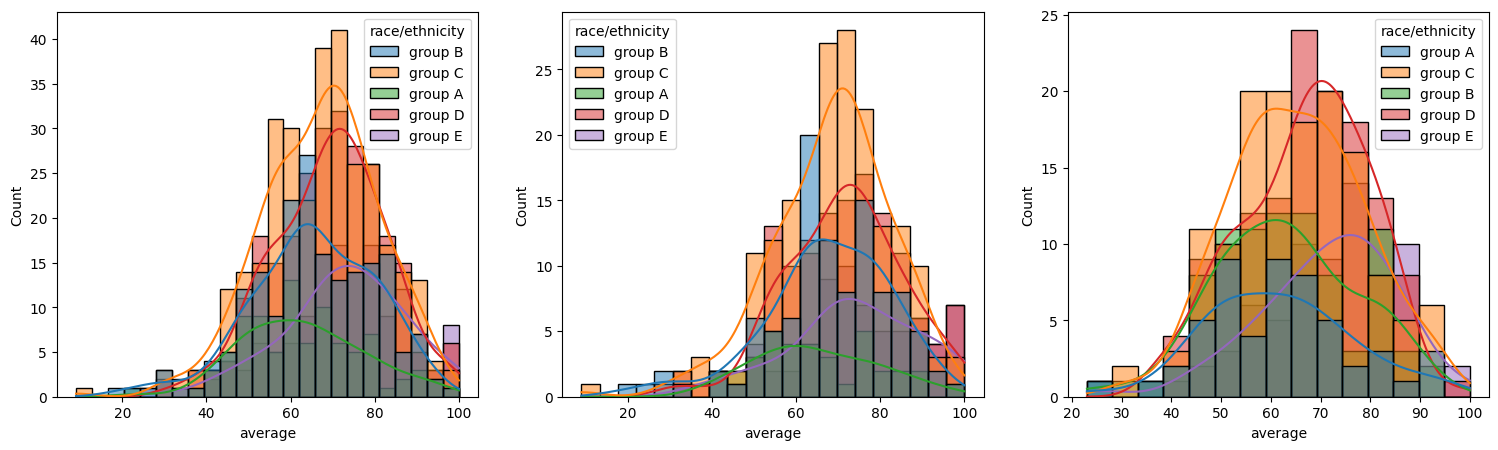

In [61]:
#impact of race/ethnicity
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

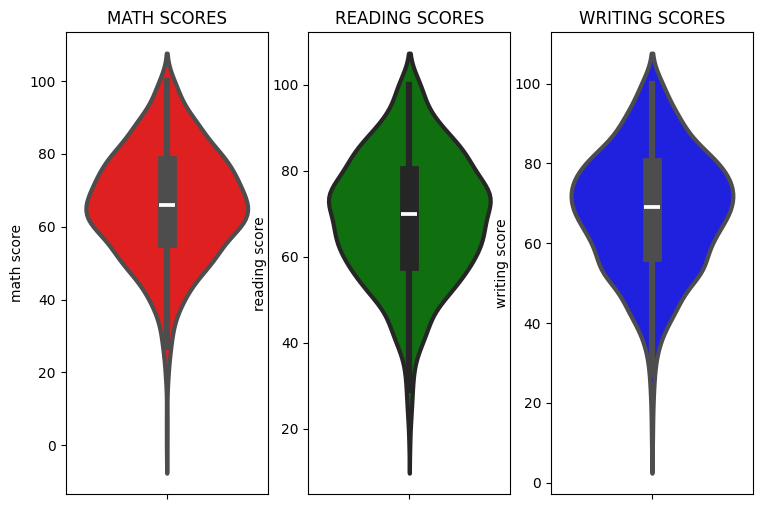

In [64]:
#Max score of students in all 3 subjects

plt.figure(figsize=(12,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

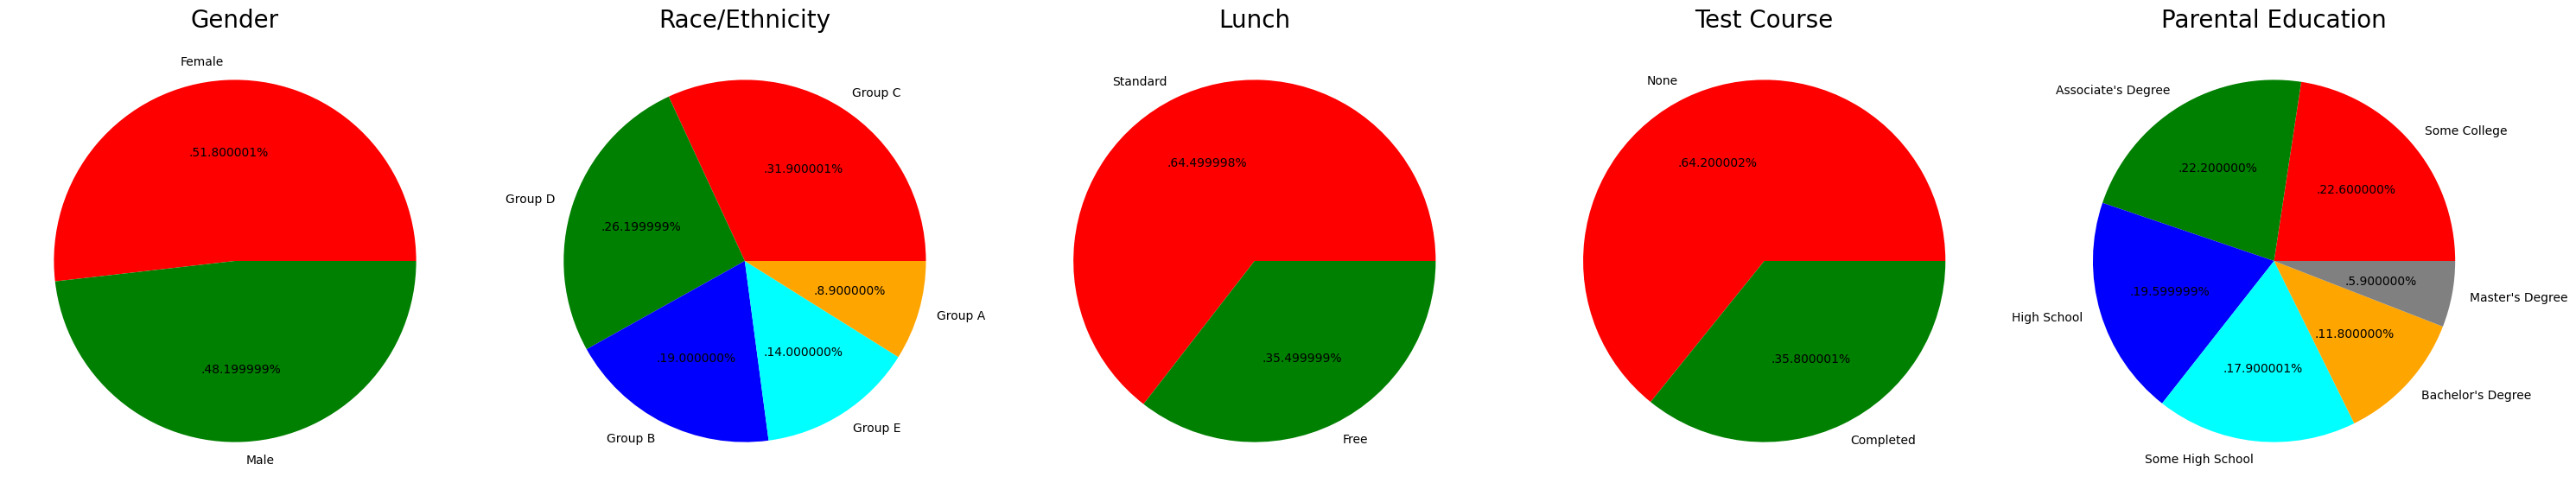

In [65]:
#Multivariate analysis
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

<Axes: xlabel='lunch', ylabel='writing score'>

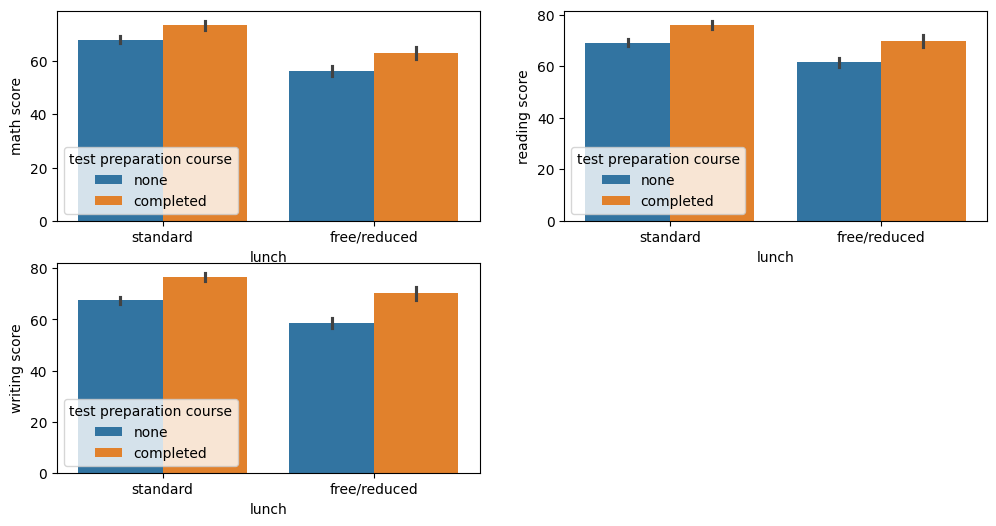

In [66]:
#impact of test prep
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

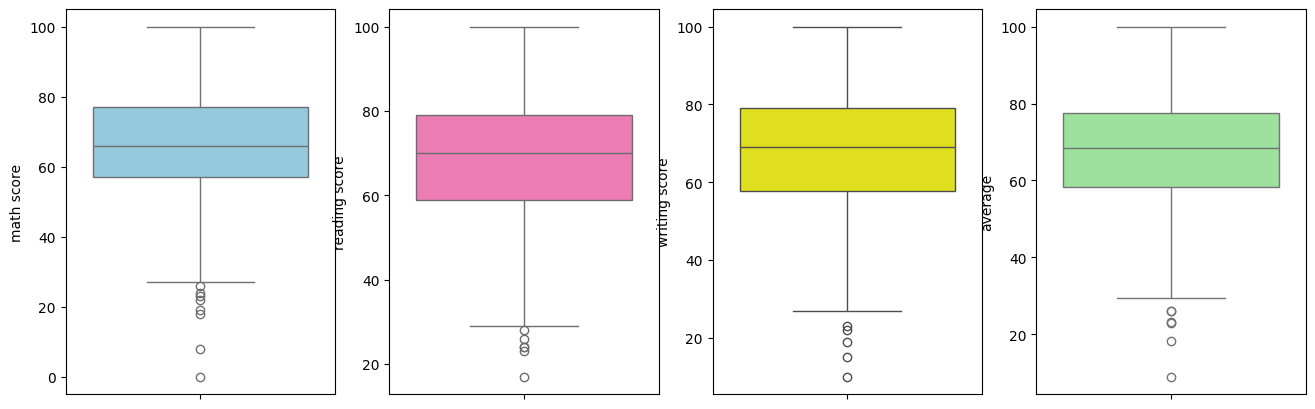

In [67]:
#checking outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

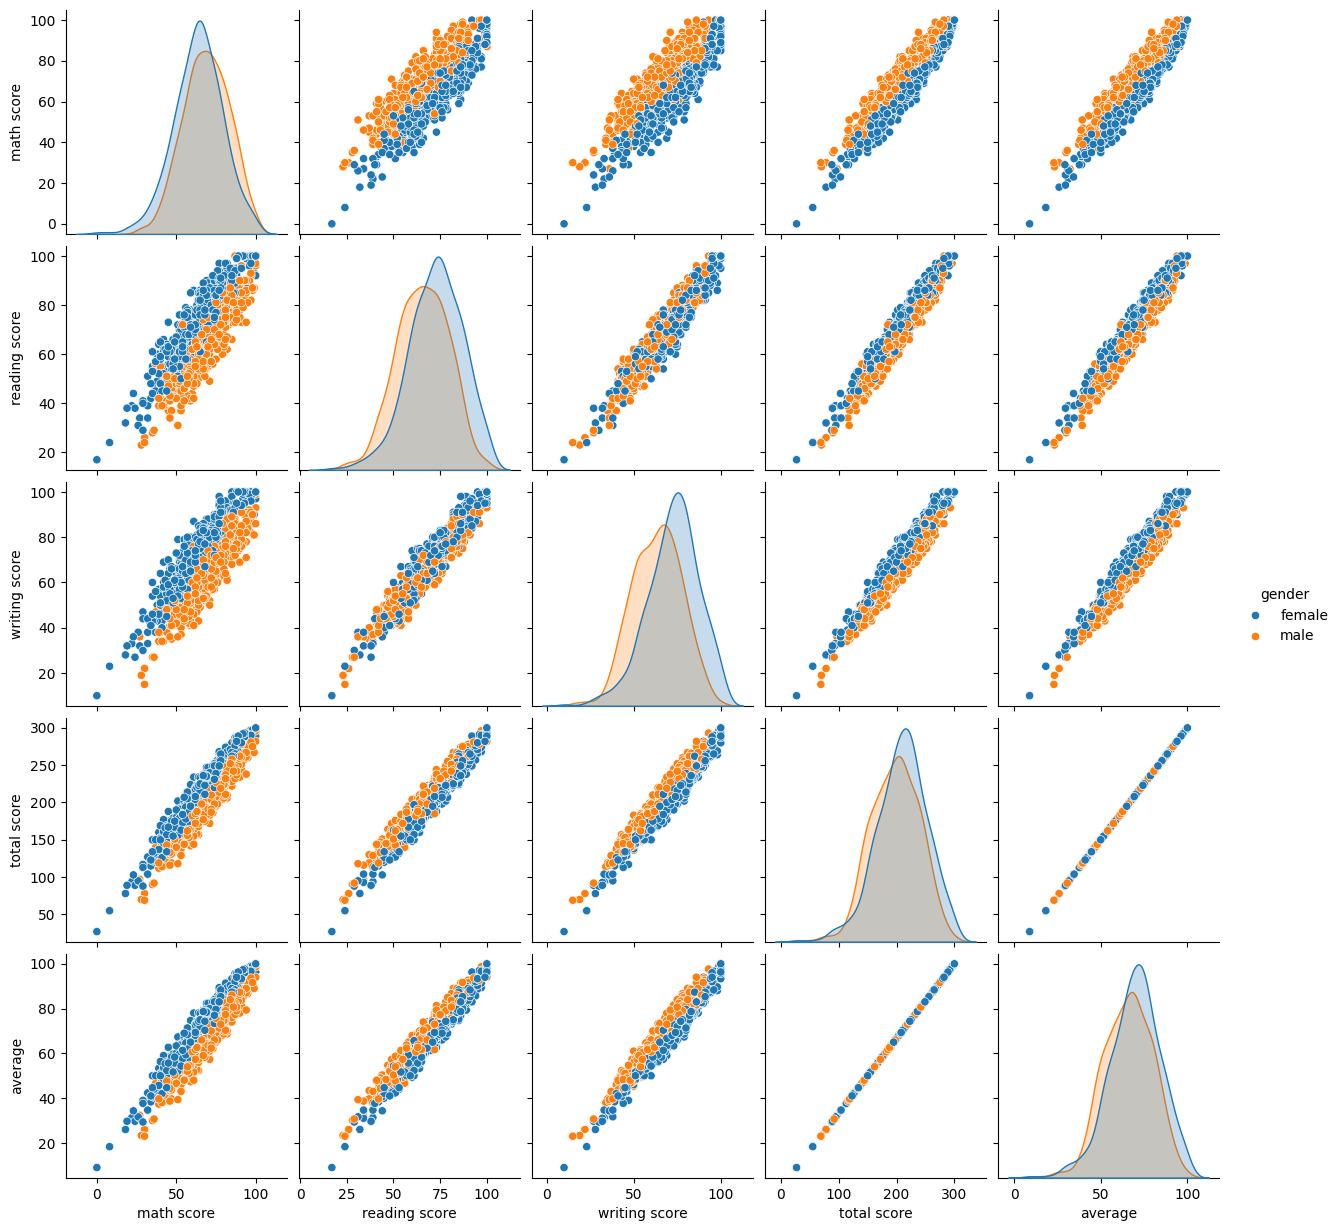

In [68]:
sns.pairplot(df,hue = 'gender')
plt.show()